In [1]:
from skimage.metrics import structural_similarity as ssim
from skimage import data, img_as_float
from skimage.metrics import mean_squared_error
import math

# def fun_PSNR(original, recovered):
#     mse = np.mean((original - recovered) ** 2)
#     if mse == 0:
#         return 100
#     PIXEL_MAX = np.amax(original.ravel())**2
#     PSNR = 10 * math.log10(PIXEL_MAX /mse)
#     return PSNR


def fun_PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = np.max(original)
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr


Text(0.5, 0, 'Receivers')

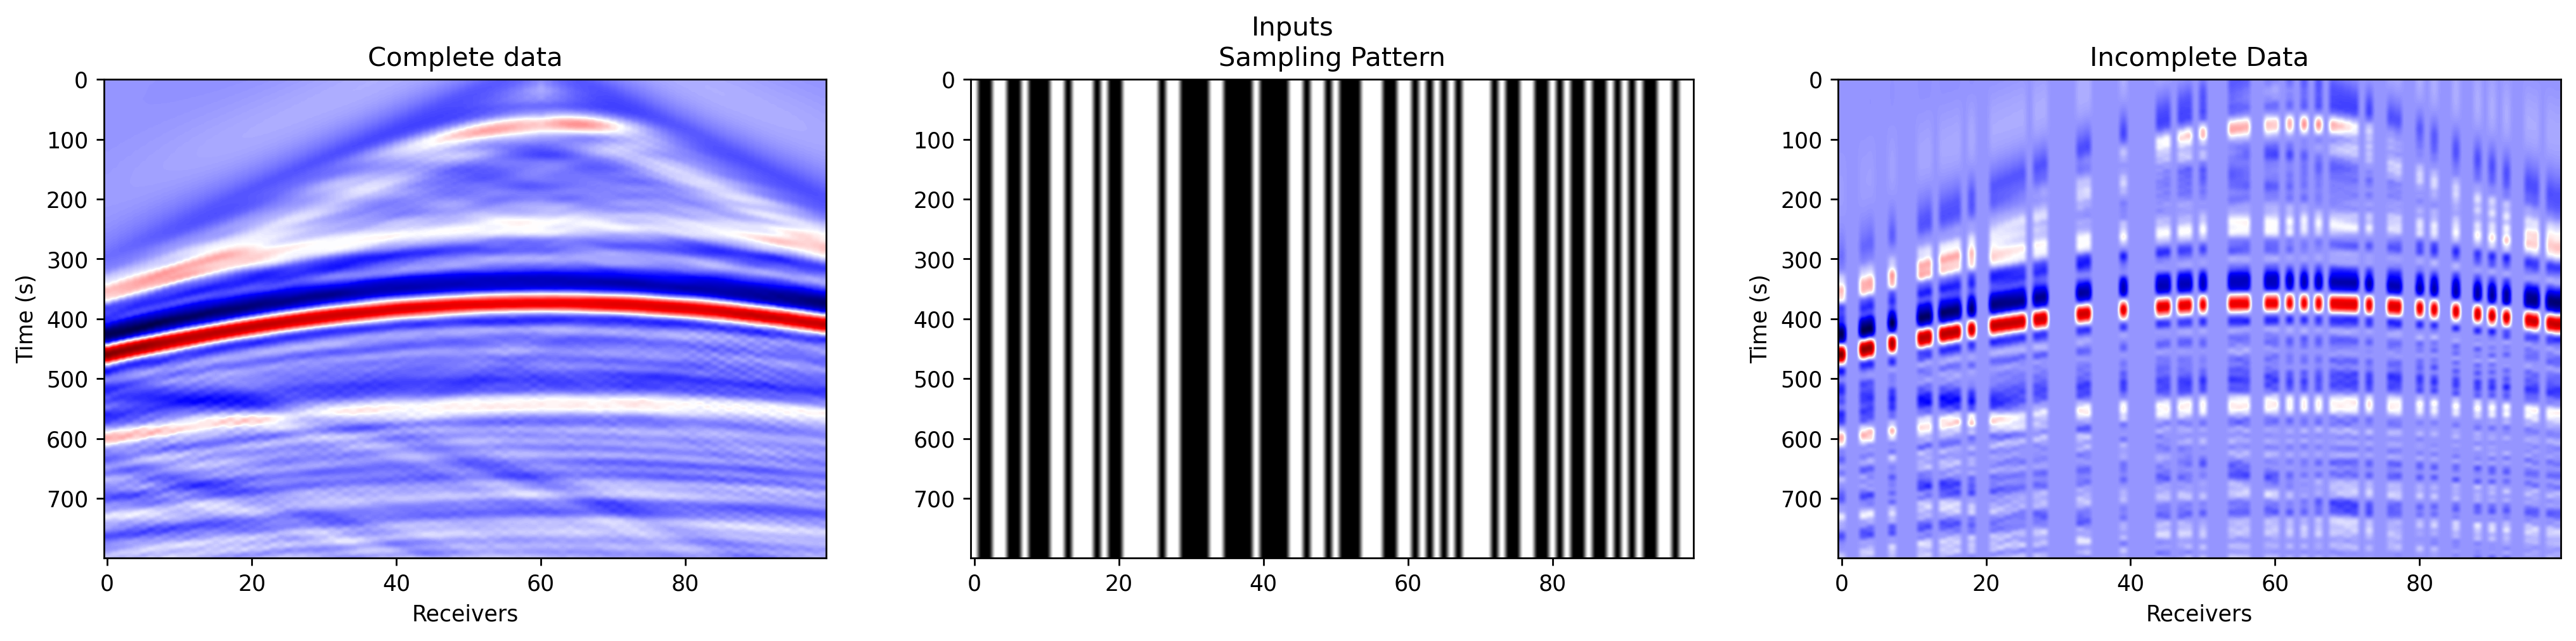

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os

from Function import *
import scipy


x = np.load('../data/data.npy')
x = x.T
x = x / np.abs(x).max()
maxiter =1000


'''
---------------  SAMPLING --------------------
'''
sr_rand = 0.5 # 1-compression
y_rand, pattern_rand, pattern_index= random_sampling(x,sr_rand)
H = pattern_index


# Sampling pattern
H0 = np.tile(pattern_rand.reshape(1,-1),(x.shape[0],1))


''' ---------- Visualization of SAMPLING----------
'''
fig, axs = plt.subplots(1, 3,dpi=250,figsize=(20, 4))
fig.suptitle('Inputs')

axs[0].imshow(x, cmap='seismic', aspect='auto')
axs[0].set_title('Complete data')
axs[0].set_ylabel('Time (s)')
axs[0].set_xlabel('Receivers')

axs[1].imshow(H0, cmap ='gray',aspect='auto')
axs[1].set_title('Sampling Pattern')

axs[2].imshow(y_rand, cmap='seismic', aspect='auto')
axs[2].set_title('Incomplete Data')
axs[2].set_ylabel('Time (s)')
axs[2].set_xlabel('Receivers')

In [3]:
index = 5


case = 'FISTA' 

#----------------- FISTA --------------------
Alg = Algorithms(x, H , 'DCT2D', 'IDCT2D')
tau = 0.1
mu = 0.3
x_result_FISTA, hist = Alg.FISTA(tau, mu, maxiter)


 FISTA: 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 6.861 dB 

2 	 Error: 4.1177e-01 	 PSNR: 13.430 dB 

3 	 Error: 2.6978e-01 	 PSNR: 16.714 dB 

4 	 Error: 1.7459e-01 	 PSNR: 18.375 dB 

5 	 Error: 1.0672e-01 	 PSNR: 19.150 dB 

6 	 Error: 5.7906e-02 	 PSNR: 19.445 dB 

7 	 Error: 2.4115e-02 	 PSNR: 19.480 dB 

8 	 Error: 2.9095e-03 	 PSNR: 19.386 dB 

9 	 Error: 8.2936e-03 	 PSNR: 19.250 dB 

10 	 Error: 1.1656e-02 	 PSNR: 19.130 dB 

11 	 Error: 1.0147e-02 	 PSNR: 19.055 dB 

12 	 Error: 6.4332e-03 	 PSNR: 19.028 dB 

13 	 Error: 2.6563e-03 	 PSNR: 19.038 dB 

14 	 Error: 1.2654e-03 	 PSNR: 19.068 dB 

15 	 Error: 2.3568e-03 	 PSNR: 19.101 dB 

16 	 Error: 2.6343e-03 	 PSNR: 19.128 dB 

17 	 Error: 2.2403e-03 	 PSNR: 19.145 dB 

18 	 Error: 1.6920e-03 	 PSNR: 19.153 dB 

19 	 Error: 1.4287e-03 	 PSNR: 19.155 dB 

20 	 Error: 1.4781e-03 	 PSNR: 19.154 dB 

21 	 Error: 1.5747e-03 	 PSNR: 19.154 dB 

22 	 Error: 1.6082e-03 	 PSNR: 19.156 dB 

23 	 Error: 1.6103e-03 	 PSN

232 	 Error: 3.3356e-03 	 PSNR: 24.944 dB 

233 	 Error: 3.3262e-03 	 PSNR: 24.991 dB 

234 	 Error: 3.3162e-03 	 PSNR: 25.039 dB 

235 	 Error: 3.3057e-03 	 PSNR: 25.087 dB 

236 	 Error: 3.2968e-03 	 PSNR: 25.135 dB 

237 	 Error: 3.2876e-03 	 PSNR: 25.182 dB 

238 	 Error: 3.2782e-03 	 PSNR: 25.231 dB 

239 	 Error: 3.2678e-03 	 PSNR: 25.279 dB 

240 	 Error: 3.2572e-03 	 PSNR: 25.328 dB 

241 	 Error: 3.2451e-03 	 PSNR: 25.377 dB 

242 	 Error: 3.2326e-03 	 PSNR: 25.426 dB 

243 	 Error: 3.2205e-03 	 PSNR: 25.475 dB 

244 	 Error: 3.2092e-03 	 PSNR: 25.524 dB 

245 	 Error: 3.1975e-03 	 PSNR: 25.574 dB 

246 	 Error: 3.1864e-03 	 PSNR: 25.623 dB 

247 	 Error: 3.1744e-03 	 PSNR: 25.673 dB 

248 	 Error: 3.1631e-03 	 PSNR: 25.724 dB 

249 	 Error: 3.1520e-03 	 PSNR: 25.774 dB 

250 	 Error: 3.1406e-03 	 PSNR: 25.825 dB 

251 	 Error: 3.1294e-03 	 PSNR: 25.876 dB 

252 	 Error: 3.1179e-03 	 PSNR: 25.927 dB 

253 	 Error: 3.1061e-03 	 PSNR: 25.979 dB 

254 	 Error: 3.0943e-03 	 PSNR: 

455 	 Error: 1.1652e-03 	 PSNR: 37.342 dB 

456 	 Error: 1.1554e-03 	 PSNR: 37.367 dB 

457 	 Error: 1.1461e-03 	 PSNR: 37.392 dB 

458 	 Error: 1.1355e-03 	 PSNR: 37.416 dB 

459 	 Error: 1.1269e-03 	 PSNR: 37.440 dB 

460 	 Error: 1.1180e-03 	 PSNR: 37.464 dB 

461 	 Error: 1.1091e-03 	 PSNR: 37.487 dB 

462 	 Error: 1.1007e-03 	 PSNR: 37.511 dB 

463 	 Error: 1.0915e-03 	 PSNR: 37.534 dB 

464 	 Error: 1.0824e-03 	 PSNR: 37.556 dB 

465 	 Error: 1.0729e-03 	 PSNR: 37.578 dB 

466 	 Error: 1.0643e-03 	 PSNR: 37.600 dB 

467 	 Error: 1.0575e-03 	 PSNR: 37.622 dB 

468 	 Error: 1.0491e-03 	 PSNR: 37.643 dB 

469 	 Error: 1.0413e-03 	 PSNR: 37.664 dB 

470 	 Error: 1.0328e-03 	 PSNR: 37.685 dB 

471 	 Error: 1.0247e-03 	 PSNR: 37.705 dB 

472 	 Error: 1.0173e-03 	 PSNR: 37.726 dB 

473 	 Error: 1.0094e-03 	 PSNR: 37.746 dB 

474 	 Error: 1.0032e-03 	 PSNR: 37.765 dB 

475 	 Error: 9.9847e-04 	 PSNR: 37.785 dB 

476 	 Error: 9.9569e-04 	 PSNR: 37.805 dB 

477 	 Error: 9.9209e-04 	 PSNR: 

686 	 Error: 3.5500e-04 	 PSNR: 38.710 dB 

687 	 Error: 3.5347e-04 	 PSNR: 38.714 dB 

688 	 Error: 3.5254e-04 	 PSNR: 38.718 dB 

689 	 Error: 3.5264e-04 	 PSNR: 38.722 dB 

690 	 Error: 3.5273e-04 	 PSNR: 38.726 dB 

691 	 Error: 3.5168e-04 	 PSNR: 38.729 dB 

692 	 Error: 3.5058e-04 	 PSNR: 38.733 dB 

693 	 Error: 3.5024e-04 	 PSNR: 38.737 dB 

694 	 Error: 3.5055e-04 	 PSNR: 38.741 dB 

695 	 Error: 3.5099e-04 	 PSNR: 38.744 dB 

696 	 Error: 3.5006e-04 	 PSNR: 38.748 dB 

697 	 Error: 3.4837e-04 	 PSNR: 38.751 dB 

698 	 Error: 3.4510e-04 	 PSNR: 38.754 dB 

699 	 Error: 3.4176e-04 	 PSNR: 38.757 dB 

700 	 Error: 3.3686e-04 	 PSNR: 38.760 dB 

701 	 Error: 3.3283e-04 	 PSNR: 38.762 dB 

702 	 Error: 3.2837e-04 	 PSNR: 38.765 dB 

703 	 Error: 3.2426e-04 	 PSNR: 38.768 dB 

704 	 Error: 3.2070e-04 	 PSNR: 38.770 dB 

705 	 Error: 3.1618e-04 	 PSNR: 38.773 dB 

706 	 Error: 3.1102e-04 	 PSNR: 38.775 dB 

707 	 Error: 3.0646e-04 	 PSNR: 38.778 dB 

708 	 Error: 3.0345e-04 	 PSNR: 

911 	 Error: 6.5166e-05 	 PSNR: 38.746 dB 

912 	 Error: 6.5118e-05 	 PSNR: 38.745 dB 

913 	 Error: 6.5118e-05 	 PSNR: 38.744 dB 

914 	 Error: 6.5050e-05 	 PSNR: 38.744 dB 

915 	 Error: 6.4924e-05 	 PSNR: 38.743 dB 

916 	 Error: 6.4826e-05 	 PSNR: 38.742 dB 

917 	 Error: 6.4826e-05 	 PSNR: 38.741 dB 

918 	 Error: 6.4954e-05 	 PSNR: 38.741 dB 

919 	 Error: 6.5083e-05 	 PSNR: 38.740 dB 

920 	 Error: 6.5225e-05 	 PSNR: 38.739 dB 

921 	 Error: 6.5441e-05 	 PSNR: 38.739 dB 

922 	 Error: 6.5707e-05 	 PSNR: 38.738 dB 

923 	 Error: 6.5924e-05 	 PSNR: 38.737 dB 

924 	 Error: 6.6274e-05 	 PSNR: 38.737 dB 

925 	 Error: 6.6692e-05 	 PSNR: 38.736 dB 

926 	 Error: 6.7190e-05 	 PSNR: 38.735 dB 

927 	 Error: 6.7790e-05 	 PSNR: 38.735 dB 

928 	 Error: 6.8313e-05 	 PSNR: 38.734 dB 

929 	 Error: 6.8957e-05 	 PSNR: 38.733 dB 

930 	 Error: 6.9617e-05 	 PSNR: 38.733 dB 

931 	 Error: 7.0268e-05 	 PSNR: 38.732 dB 

932 	 Error: 7.0907e-05 	 PSNR: 38.731 dB 

933 	 Error: 7.1537e-05 	 PSNR: 

Text(0.5, 0, '# Iterations')

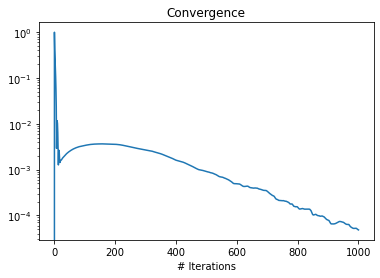

In [4]:

plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')
plt.xlabel('# Iterations')

In [5]:
np.max(x) #_result_FISTA)

1.0

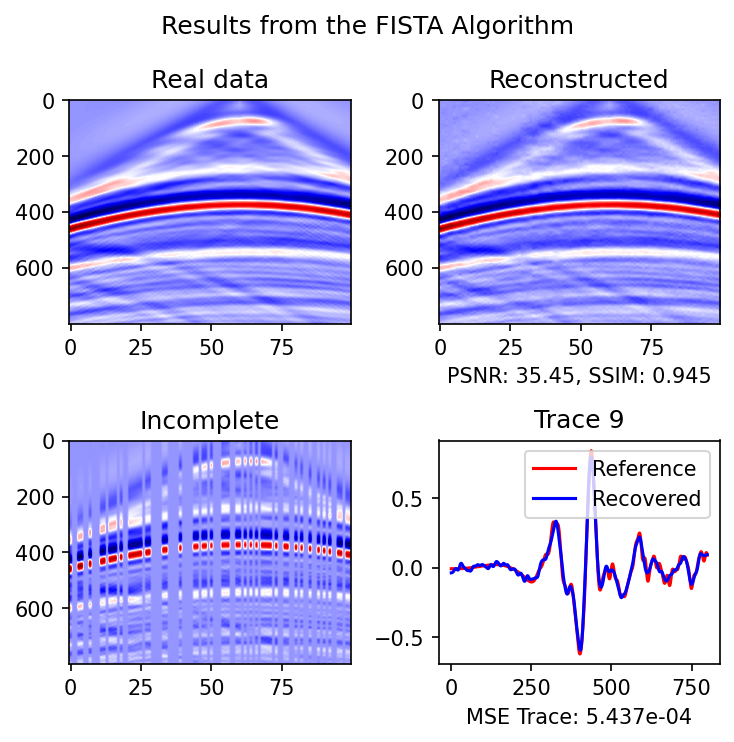

In [6]:
x_rec = x_result_FISTA.copy()

temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')


axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')


metric = PSNR(x[:, H_elim],x_rec[:, H_elim])
metric_ssim = ssim(x[:, H_elim],x_rec[:, H_elim])

axs[0, 1].imshow(x_rec, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {metric:.2f}, SSIM: {metric_ssim:.3f}')


axs[1, 1].plot(x[:,H_elim[index]], 'r', label='Reference')
axs[1, 1].plot(x_rec[:,H_elim[index]], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))

mse_trace = mean_squared_error(x [:,H_elim[index]],x_rec[:,H_elim[index]])


axs[1, 1].set_xlabel(f'MSE Trace: {mse_trace:.3e}')


fig.tight_layout()
plt.show()

In [7]:
case = 'GAP' 

# ------------------GAP--------------
Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
tau = 1e-0
x_result_GAP, hist = Alg.GAP(tau, maxiter) # inputs: tau, maxiter





---------GAP method---------- 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 19.062 dB 

2 	 Error: 2.9544e-03 	 PSNR: 19.071 dB 

3 	 Error: 2.8327e-03 	 PSNR: 19.080 dB 

4 	 Error: 2.7313e-03 	 PSNR: 19.090 dB 

5 	 Error: 2.6438e-03 	 PSNR: 19.100 dB 

6 	 Error: 2.5667e-03 	 PSNR: 19.110 dB 

7 	 Error: 2.5019e-03 	 PSNR: 19.119 dB 

8 	 Error: 2.4454e-03 	 PSNR: 19.129 dB 

9 	 Error: 2.3956e-03 	 PSNR: 19.139 dB 

10 	 Error: 2.3512e-03 	 PSNR: 19.150 dB 

11 	 Error: 2.3120e-03 	 PSNR: 19.160 dB 

12 	 Error: 2.2697e-03 	 PSNR: 19.169 dB 

13 	 Error: 2.2304e-03 	 PSNR: 19.179 dB 

14 	 Error: 2.1966e-03 	 PSNR: 19.188 dB 

15 	 Error: 2.1657e-03 	 PSNR: 19.198 dB 

16 	 Error: 2.1390e-03 	 PSNR: 19.208 dB 

17 	 Error: 2.1143e-03 	 PSNR: 19.218 dB 

18 	 Error: 2.0914e-03 	 PSNR: 19.228 dB 

19 	 Error: 2.0708e-03 	 PSNR: 19.238 dB 

20 	 Error: 2.0518e-03 	 PSNR: 19.247 dB 

21 	 Error: 2.0332e-03 	 PSNR: 19.257 dB 

22 	 Error: 2.0153e-03 	 PSNR: 19.267 dB 

23 	 

231 	 Error: 9.9637e-04 	 PSNR: 21.095 dB 

232 	 Error: 9.9357e-04 	 PSNR: 21.103 dB 

233 	 Error: 9.9163e-04 	 PSNR: 21.111 dB 

234 	 Error: 9.8959e-04 	 PSNR: 21.119 dB 

235 	 Error: 9.8759e-04 	 PSNR: 21.127 dB 

236 	 Error: 9.8542e-04 	 PSNR: 21.136 dB 

237 	 Error: 9.8362e-04 	 PSNR: 21.144 dB 

238 	 Error: 9.8224e-04 	 PSNR: 21.152 dB 

239 	 Error: 9.8119e-04 	 PSNR: 21.160 dB 

240 	 Error: 9.7996e-04 	 PSNR: 21.168 dB 

241 	 Error: 9.7827e-04 	 PSNR: 21.176 dB 

242 	 Error: 9.7680e-04 	 PSNR: 21.185 dB 

243 	 Error: 9.7524e-04 	 PSNR: 21.193 dB 

244 	 Error: 9.7351e-04 	 PSNR: 21.201 dB 

245 	 Error: 9.7127e-04 	 PSNR: 21.209 dB 

246 	 Error: 9.6911e-04 	 PSNR: 21.217 dB 

247 	 Error: 9.6694e-04 	 PSNR: 21.225 dB 

248 	 Error: 9.6486e-04 	 PSNR: 21.234 dB 

249 	 Error: 9.6338e-04 	 PSNR: 21.242 dB 

250 	 Error: 9.6143e-04 	 PSNR: 21.250 dB 

251 	 Error: 9.5922e-04 	 PSNR: 21.258 dB 

252 	 Error: 9.5759e-04 	 PSNR: 21.266 dB 

253 	 Error: 9.5620e-04 	 PSNR: 

462 	 Error: 6.9808e-04 	 PSNR: 22.950 dB 

463 	 Error: 6.9730e-04 	 PSNR: 22.957 dB 

464 	 Error: 6.9660e-04 	 PSNR: 22.965 dB 

465 	 Error: 6.9605e-04 	 PSNR: 22.973 dB 

466 	 Error: 6.9554e-04 	 PSNR: 22.981 dB 

467 	 Error: 6.9503e-04 	 PSNR: 22.989 dB 

468 	 Error: 6.9435e-04 	 PSNR: 22.997 dB 

469 	 Error: 6.9357e-04 	 PSNR: 23.005 dB 

470 	 Error: 6.9296e-04 	 PSNR: 23.013 dB 

471 	 Error: 6.9236e-04 	 PSNR: 23.021 dB 

472 	 Error: 6.9179e-04 	 PSNR: 23.029 dB 

473 	 Error: 6.9125e-04 	 PSNR: 23.037 dB 

474 	 Error: 6.9067e-04 	 PSNR: 23.045 dB 

475 	 Error: 6.8999e-04 	 PSNR: 23.053 dB 

476 	 Error: 6.8913e-04 	 PSNR: 23.060 dB 

477 	 Error: 6.8828e-04 	 PSNR: 23.068 dB 

478 	 Error: 6.8746e-04 	 PSNR: 23.076 dB 

479 	 Error: 6.8637e-04 	 PSNR: 23.084 dB 

480 	 Error: 6.8529e-04 	 PSNR: 23.092 dB 

481 	 Error: 6.8435e-04 	 PSNR: 23.100 dB 

482 	 Error: 6.8364e-04 	 PSNR: 23.108 dB 

483 	 Error: 6.8271e-04 	 PSNR: 23.116 dB 

484 	 Error: 6.8179e-04 	 PSNR: 

689 	 Error: 5.1168e-04 	 PSNR: 24.713 dB 

690 	 Error: 5.1100e-04 	 PSNR: 24.721 dB 

691 	 Error: 5.1049e-04 	 PSNR: 24.728 dB 

692 	 Error: 5.1004e-04 	 PSNR: 24.736 dB 

693 	 Error: 5.0954e-04 	 PSNR: 24.744 dB 

694 	 Error: 5.0897e-04 	 PSNR: 24.751 dB 

695 	 Error: 5.0739e-04 	 PSNR: 24.759 dB 

696 	 Error: 5.0575e-04 	 PSNR: 24.767 dB 

697 	 Error: 5.0417e-04 	 PSNR: 24.775 dB 

698 	 Error: 5.0264e-04 	 PSNR: 24.782 dB 

699 	 Error: 5.0143e-04 	 PSNR: 24.790 dB 

700 	 Error: 5.0055e-04 	 PSNR: 24.798 dB 

701 	 Error: 4.9986e-04 	 PSNR: 24.805 dB 

702 	 Error: 4.9926e-04 	 PSNR: 24.813 dB 

703 	 Error: 4.9873e-04 	 PSNR: 24.821 dB 

704 	 Error: 4.9827e-04 	 PSNR: 24.828 dB 

705 	 Error: 4.9787e-04 	 PSNR: 24.836 dB 

706 	 Error: 4.9740e-04 	 PSNR: 24.844 dB 

707 	 Error: 4.9692e-04 	 PSNR: 24.851 dB 

708 	 Error: 4.9650e-04 	 PSNR: 24.859 dB 

709 	 Error: 4.9615e-04 	 PSNR: 24.867 dB 

710 	 Error: 4.9584e-04 	 PSNR: 24.874 dB 

711 	 Error: 4.9556e-04 	 PSNR: 

888 	 Error: 3.9486e-04 	 PSNR: 26.238 dB 

889 	 Error: 3.9439e-04 	 PSNR: 26.246 dB 

890 	 Error: 3.9382e-04 	 PSNR: 26.253 dB 

891 	 Error: 3.9324e-04 	 PSNR: 26.261 dB 

892 	 Error: 3.9266e-04 	 PSNR: 26.268 dB 

893 	 Error: 3.9214e-04 	 PSNR: 26.276 dB 

894 	 Error: 3.9166e-04 	 PSNR: 26.283 dB 

895 	 Error: 3.9125e-04 	 PSNR: 26.291 dB 

896 	 Error: 3.9088e-04 	 PSNR: 26.299 dB 

897 	 Error: 3.9057e-04 	 PSNR: 26.306 dB 

898 	 Error: 3.9012e-04 	 PSNR: 26.314 dB 

899 	 Error: 3.8971e-04 	 PSNR: 26.321 dB 

900 	 Error: 3.8932e-04 	 PSNR: 26.329 dB 

901 	 Error: 3.8886e-04 	 PSNR: 26.337 dB 

902 	 Error: 3.8838e-04 	 PSNR: 26.344 dB 

903 	 Error: 3.8797e-04 	 PSNR: 26.352 dB 

904 	 Error: 3.8761e-04 	 PSNR: 26.359 dB 

905 	 Error: 3.8725e-04 	 PSNR: 26.367 dB 

906 	 Error: 3.8694e-04 	 PSNR: 26.375 dB 

907 	 Error: 3.8661e-04 	 PSNR: 26.382 dB 

908 	 Error: 3.8629e-04 	 PSNR: 26.390 dB 

909 	 Error: 3.8598e-04 	 PSNR: 26.397 dB 

910 	 Error: 3.8569e-04 	 PSNR: 

Text(0.5, 0, '# Iterations')

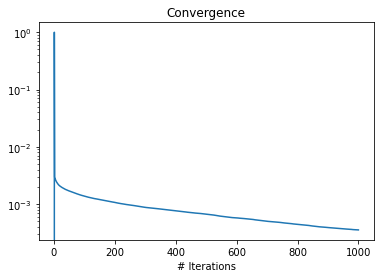

In [8]:
plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')

plt.xlabel('# Iterations')

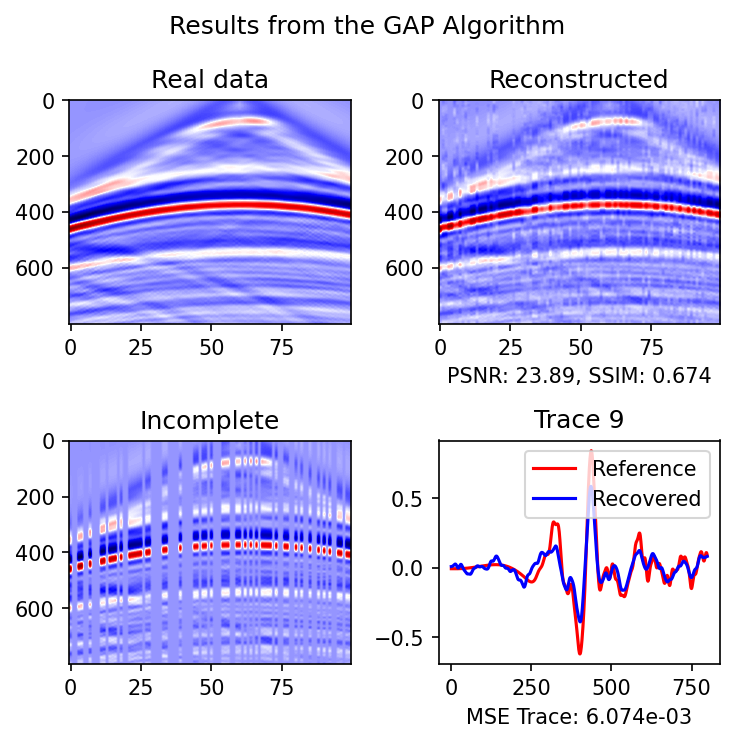

In [9]:
# -----------------
x_rec = x_result_GAP.copy()

#-----------------
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]

fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')


axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')


metric = PSNR(x[:, H_elim],x_rec[:, H_elim])
metric_ssim = ssim(x[:, H_elim],x_rec[:, H_elim])

axs[0, 1].imshow(x_rec, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {metric:.2f}, SSIM: {metric_ssim:.3f}')


axs[1, 1].plot(x[:,H_elim[index]], 'r', label='Reference')
axs[1, 1].plot(x_rec[:,H_elim[index]], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))

mse_trace = mean_squared_error(x [:,H_elim[index]],x_rec[:,H_elim[index]])


axs[1, 1].set_xlabel(f'MSE Trace: {mse_trace:.3e}')


fig.tight_layout()
plt.show()

In [10]:
case = 'TWIST' 

# ------------------TwIST--------------
Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
# default parameters
alpha = 1.2
beta  = 1.998
tau = 0.9

x_result_TWIST, hist = Alg.TwIST(tau, alpha, beta, maxiter)



---------TwIST method---------- 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 22.058 dB 

2 	 Error: 3.9446e+00 	 PSNR: 9.843 dB 

3 	 Error: 6.8359e-01 	 PSNR: 20.914 dB 

4 	 Error: 4.1938e-01 	 PSNR: 18.160 dB 

5 	 Error: 1.2376e-01 	 PSNR: 19.378 dB 

6 	 Error: 2.5916e-02 	 PSNR: 19.181 dB 

7 	 Error: 6.9274e-03 	 PSNR: 19.159 dB 

8 	 Error: 1.0407e-02 	 PSNR: 19.261 dB 

9 	 Error: 7.6725e-03 	 PSNR: 19.229 dB 

10 	 Error: 5.7295e-03 	 PSNR: 19.279 dB 

11 	 Error: 4.6676e-03 	 PSNR: 19.289 dB 

12 	 Error: 4.4934e-03 	 PSNR: 19.315 dB 

13 	 Error: 4.3764e-03 	 PSNR: 19.335 dB 

14 	 Error: 4.3026e-03 	 PSNR: 19.357 dB 

15 	 Error: 4.2323e-03 	 PSNR: 19.378 dB 

16 	 Error: 4.1693e-03 	 PSNR: 19.401 dB 

17 	 Error: 4.1110e-03 	 PSNR: 19.421 dB 

18 	 Error: 4.0562e-03 	 PSNR: 19.443 dB 

19 	 Error: 3.9980e-03 	 PSNR: 19.463 dB 

20 	 Error: 3.9489e-03 	 PSNR: 19.485 dB 

21 	 Error: 3.9046e-03 	 PSNR: 19.504 dB 

22 	 Error: 3.8657e-03 	 PSNR: 19.525 dB 

23 	

190 	 Error: 1.6515e-03 	 PSNR: 22.671 dB 

191 	 Error: 1.6460e-03 	 PSNR: 22.689 dB 

192 	 Error: 1.6414e-03 	 PSNR: 22.707 dB 

193 	 Error: 1.6376e-03 	 PSNR: 22.725 dB 

194 	 Error: 1.6318e-03 	 PSNR: 22.743 dB 

195 	 Error: 1.6251e-03 	 PSNR: 22.761 dB 

196 	 Error: 1.6193e-03 	 PSNR: 22.778 dB 

197 	 Error: 1.6147e-03 	 PSNR: 22.796 dB 

198 	 Error: 1.6108e-03 	 PSNR: 22.814 dB 

199 	 Error: 1.6057e-03 	 PSNR: 22.832 dB 

200 	 Error: 1.6012e-03 	 PSNR: 22.850 dB 

201 	 Error: 1.5964e-03 	 PSNR: 22.868 dB 

202 	 Error: 1.5922e-03 	 PSNR: 22.886 dB 

203 	 Error: 1.5874e-03 	 PSNR: 22.903 dB 

204 	 Error: 1.5825e-03 	 PSNR: 22.921 dB 

205 	 Error: 1.5776e-03 	 PSNR: 22.939 dB 

206 	 Error: 1.5719e-03 	 PSNR: 22.957 dB 

207 	 Error: 1.5666e-03 	 PSNR: 22.975 dB 

208 	 Error: 1.5631e-03 	 PSNR: 22.993 dB 

209 	 Error: 1.5599e-03 	 PSNR: 23.010 dB 

210 	 Error: 1.5572e-03 	 PSNR: 23.028 dB 

211 	 Error: 1.5545e-03 	 PSNR: 23.046 dB 

212 	 Error: 1.5510e-03 	 PSNR: 

413 	 Error: 8.5011e-04 	 PSNR: 26.543 dB 

414 	 Error: 8.4829e-04 	 PSNR: 26.560 dB 

415 	 Error: 8.4649e-04 	 PSNR: 26.577 dB 

416 	 Error: 8.4499e-04 	 PSNR: 26.594 dB 

417 	 Error: 8.4346e-04 	 PSNR: 26.612 dB 

418 	 Error: 8.4189e-04 	 PSNR: 26.629 dB 

419 	 Error: 8.4011e-04 	 PSNR: 26.646 dB 

420 	 Error: 8.3893e-04 	 PSNR: 26.663 dB 

421 	 Error: 8.3771e-04 	 PSNR: 26.680 dB 

422 	 Error: 8.3601e-04 	 PSNR: 26.697 dB 

423 	 Error: 8.3385e-04 	 PSNR: 26.714 dB 

424 	 Error: 8.3099e-04 	 PSNR: 26.732 dB 

425 	 Error: 8.2898e-04 	 PSNR: 26.749 dB 

426 	 Error: 8.2617e-04 	 PSNR: 26.766 dB 

427 	 Error: 8.2474e-04 	 PSNR: 26.783 dB 

428 	 Error: 8.2317e-04 	 PSNR: 26.800 dB 

429 	 Error: 8.2197e-04 	 PSNR: 26.817 dB 

430 	 Error: 8.2036e-04 	 PSNR: 26.834 dB 

431 	 Error: 8.1938e-04 	 PSNR: 26.852 dB 

432 	 Error: 8.1826e-04 	 PSNR: 26.869 dB 

433 	 Error: 8.1728e-04 	 PSNR: 26.886 dB 

434 	 Error: 8.1635e-04 	 PSNR: 26.903 dB 

435 	 Error: 8.1485e-04 	 PSNR: 

618 	 Error: 5.3571e-04 	 PSNR: 30.020 dB 

619 	 Error: 5.3496e-04 	 PSNR: 30.037 dB 

620 	 Error: 5.3385e-04 	 PSNR: 30.053 dB 

621 	 Error: 5.3285e-04 	 PSNR: 30.070 dB 

622 	 Error: 5.3190e-04 	 PSNR: 30.086 dB 

623 	 Error: 5.3081e-04 	 PSNR: 30.103 dB 

624 	 Error: 5.3006e-04 	 PSNR: 30.119 dB 

625 	 Error: 5.2935e-04 	 PSNR: 30.136 dB 

626 	 Error: 5.2795e-04 	 PSNR: 30.152 dB 

627 	 Error: 5.2649e-04 	 PSNR: 30.168 dB 

628 	 Error: 5.2517e-04 	 PSNR: 30.185 dB 

629 	 Error: 5.2425e-04 	 PSNR: 30.201 dB 

630 	 Error: 5.2287e-04 	 PSNR: 30.218 dB 

631 	 Error: 5.2211e-04 	 PSNR: 30.234 dB 

632 	 Error: 5.2121e-04 	 PSNR: 30.250 dB 

633 	 Error: 5.2058e-04 	 PSNR: 30.267 dB 

634 	 Error: 5.1982e-04 	 PSNR: 30.283 dB 

635 	 Error: 5.1905e-04 	 PSNR: 30.299 dB 

636 	 Error: 5.1828e-04 	 PSNR: 30.316 dB 

637 	 Error: 5.1755e-04 	 PSNR: 30.332 dB 

638 	 Error: 5.1664e-04 	 PSNR: 30.348 dB 

639 	 Error: 5.1601e-04 	 PSNR: 30.364 dB 

640 	 Error: 5.1547e-04 	 PSNR: 

820 	 Error: 2.9815e-04 	 PSNR: 33.018 dB 

821 	 Error: 2.9686e-04 	 PSNR: 33.030 dB 

822 	 Error: 2.9582e-04 	 PSNR: 33.042 dB 

823 	 Error: 2.9494e-04 	 PSNR: 33.055 dB 

824 	 Error: 2.9411e-04 	 PSNR: 33.067 dB 

825 	 Error: 2.9336e-04 	 PSNR: 33.079 dB 

826 	 Error: 2.9269e-04 	 PSNR: 33.091 dB 

827 	 Error: 2.9174e-04 	 PSNR: 33.103 dB 

828 	 Error: 2.9114e-04 	 PSNR: 33.116 dB 

829 	 Error: 2.9048e-04 	 PSNR: 33.128 dB 

830 	 Error: 2.8970e-04 	 PSNR: 33.140 dB 

831 	 Error: 2.8899e-04 	 PSNR: 33.152 dB 

832 	 Error: 2.8827e-04 	 PSNR: 33.164 dB 

833 	 Error: 2.8701e-04 	 PSNR: 33.176 dB 

834 	 Error: 2.8559e-04 	 PSNR: 33.188 dB 

835 	 Error: 2.8434e-04 	 PSNR: 33.200 dB 

836 	 Error: 2.8328e-04 	 PSNR: 33.212 dB 

837 	 Error: 2.8272e-04 	 PSNR: 33.224 dB 

838 	 Error: 2.8231e-04 	 PSNR: 33.236 dB 

839 	 Error: 2.8191e-04 	 PSNR: 33.248 dB 

840 	 Error: 2.8157e-04 	 PSNR: 33.261 dB 

841 	 Error: 2.8114e-04 	 PSNR: 33.273 dB 

842 	 Error: 2.8045e-04 	 PSNR: 

Text(0.5, 0, '# Iterations')

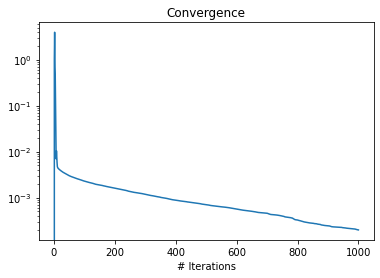

In [11]:
plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')
plt.xlabel('# Iterations')


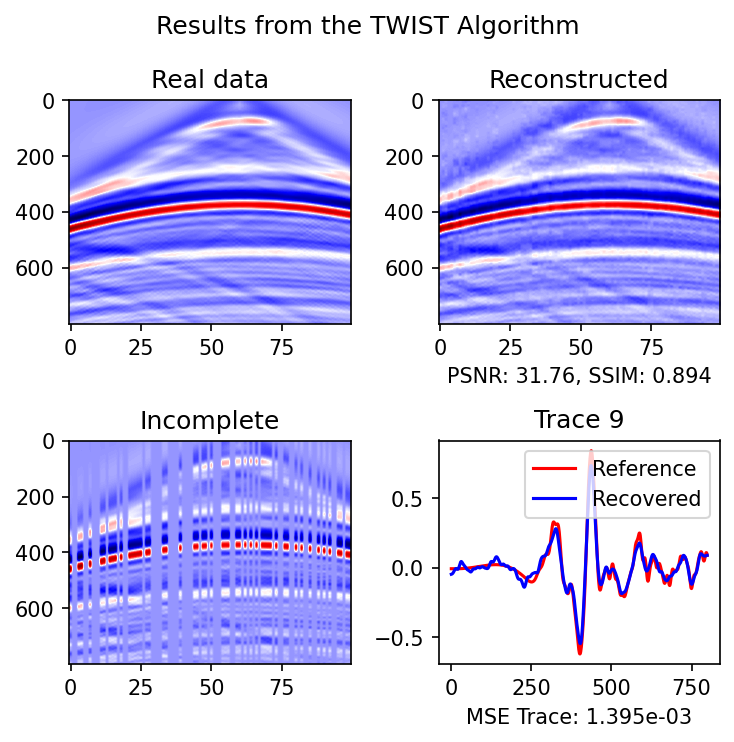

In [12]:
# -----------------
x_rec = x_result_TWIST.copy()

#-----------------
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]

fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')


axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')


metric = PSNR(x[:, H_elim],x_rec[:, H_elim])
metric_ssim = ssim(x[:, H_elim],x_rec[:, H_elim])

axs[0, 1].imshow(x_rec, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {metric:.2f}, SSIM: {metric_ssim:.3f}')


axs[1, 1].plot(x[:,H_elim[index]], 'r', label='Reference')
axs[1, 1].plot(x_rec[:,H_elim[index]], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))

mse_trace = mean_squared_error(x [:,H_elim[index]],x_rec[:,H_elim[index]])


axs[1, 1].set_xlabel(f'MSE Trace: {mse_trace:.3e}')


fig.tight_layout()
plt.show()

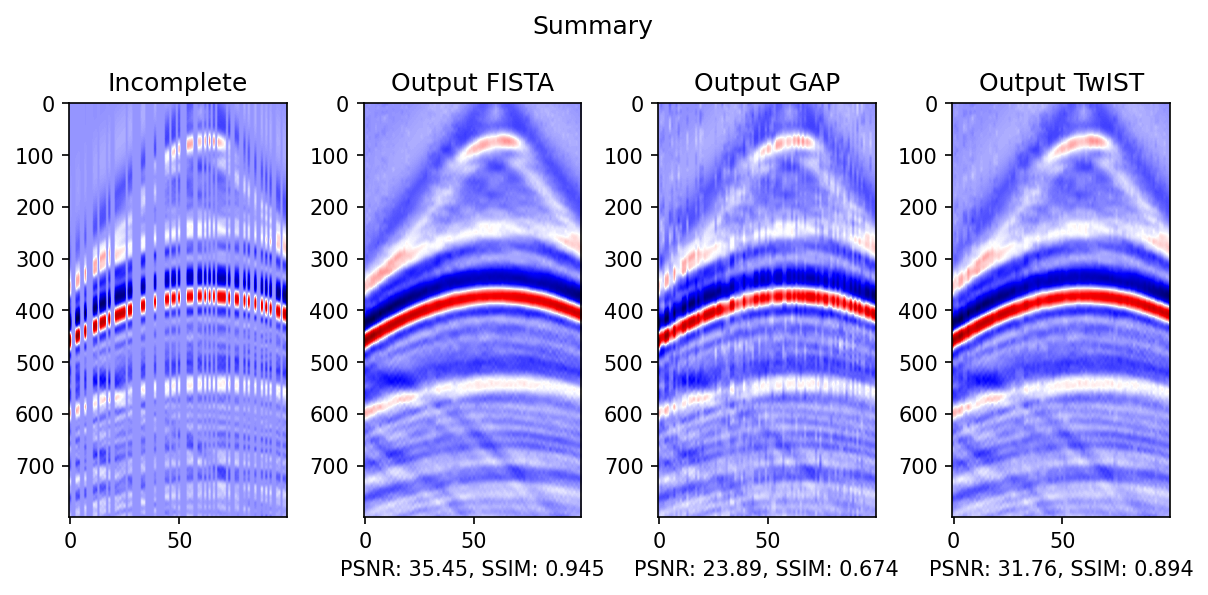

In [13]:
#-------------- Visualization ----------------
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(1,4,dpi=150,figsize=(8, 4))
fig.suptitle('Summary')

axs[0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[0].set_title('Incomplete')


axs[1].imshow(x_result_FISTA, cmap='seismic', aspect='auto')
axs[1].set_title('Output FISTA')
axs[1].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_FISTA[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_FISTA[:, H_elim]):.3f}')


axs[2].imshow(x_result_GAP, cmap='seismic', aspect='auto')
axs[2].set_title('Output GAP')
axs[2].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_GAP[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_GAP[:, H_elim]):.3f}')


axs[3].imshow(x_result_TWIST, cmap='seismic', aspect='auto')
axs[3].set_title('Output TwIST')
axs[3].set_xlabel(f'PSNR: {PSNR(x[:, H_elim],x_result_TWIST[:, H_elim]):.2f}, SSIM: {ssim(x[:, H_elim],x_result_TWIST[:, H_elim]):.3f}')




fig.tight_layout()
plt.show()